# Hydrologische Modelle - Übung 4

## Vorgehensweise

Sie befinden sich hier in einem Jupyter Notebook, auf welchem Sie Matlab-Code ausführen können. Bitte lesen Sie sich die folgenden Hinweise zur Nutzung dieses Notebooks gut durch.

* bitte schreiben Sie Ihren Code entsprechend der jeweiligen Übungsaufgabe in das Feld unter der Aufgabe
* Ihren Code führen Sie hier (in Jupyter Notebooks) durch die Tastenkombination Shift + Enter im jeweiligen Codeblock aus
* Die Lösung zur Aufgabe kann durch einen Klick auf die drei Punkte unter "Lösung:" eingesehen werden. Bitte werfen Sie erst einen Blick in die Lösungen, wenn Ihr Code entweder läuft oder sie alles probiert haben, was Ihnen als Lösungsweg einfällt (Sie verderben sich sonst selbst den ganzen Knobelspaß und das Erfolgserlebnis am Ende ;-) ). Oft hilft ein Blick in die PDF zur jeweiligen Übung oder auch Google.
* Code-Blöcke und ihr Output lassen sich in Jupyter Notebooks durch einen Klick auf den linken blauen Balken ausblenden.
* Oftmals gibt es nicht nur DEN einen Weg in Matlab (und anderen Programmiersprachen) - probieren Sie ruhig alles aus! Viel können Sie hier nicht kaputt machen. ;-)

In dem Sinne viel Spaß!

## Inhalte
* Funktionen
* Modularisierung und Übergabe von function handles

## Funktionen

#### 1. Schreiben Sie eine Funktion **MeanArithmetic.m**, die aus einem Inputvektor das arithmetische Mittel desselben berechnet und in die Variable **out** ausgibt.

Lösung MeanArithmetic:

In [10]:
%%file MeanArithmetic_loesung.m
%% MeanArithmetic_loesung.m
% Calculation of arithmetic mean of a one dimensional dataseries.
%
%   Syntax: out = MeanArithmetic_loesung(in1)
%
% Variables:
% in1:   One dimensional vector of input data.
% out:   Arithmetic mean of input data.

function out = MeanArithmetic_loesung(in1)

n = numel(in1);
out = sum(in1)/n;

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MeanArithmetic_loesung.m'.


#### 2. Tun Sie dasselbe für mindestens eine weitere Mittelwertdefinition:  
$\begin{align*} MeanMedian.m: \bar{x}_{M}&= \begin{cases}x\left(\frac{n+1}{2}\right) & \text { wenn } n \text { ungerade } \\ \frac{1}{2}\left[x\left(\frac{n}{2}\right)+x\left(\frac{n}{2}+1\right)\right] & \text { wenn } n \text { gerade }\end{cases}\\
MeanGeometric.m: \bar{x}_{G}&=\sqrt[n]{\prod x_{i}}\\
MeanHarmonic.m: \bar{x}_{H}&=\frac{n}{\sum \frac{1}{x_{i}}}\\
MeanExponential.m: \bar{x}_{E}&=\sqrt[m]{\frac{1}{n} \sum x_{i}^{m}} \quad \text {im Spezialfall } m=2 \end{align*}$

#### 3. Schreiben Sie in die Header der beiden Funktionen, was diese bewirken und welche Ausgabe- und Eingabeargumente diese zulassen (Beispiel eines typischen Aufrufes!).
Hinweis: Ergänzen Sie einfach ihre bereits oben dafür verwendeten Zellen.

Lösung MeanMedian:

In [17]:
%%file MeanMedian_loesung.m
%% MeanMedian_loesung.m
% Calculation of median of a one dimensional dataseries.
%
%   Syntax: out = MeanMedian_loesung(in1)
%
% Variables:
% in1:   One dimensional vector of input data.
% out:   Median of input data.

function out = MeanMedian_loesung(in1)

n=numel(in1);
in1 = sort(in1);

if mod(n,2)==0
    out = 0.5*(in1(n/2) + in1(n/2+1));
else 
    out = in1((n+1)/2);
end

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MeanMedian_loesung.m'.


Lösung MeanGeometric:

In [16]:
%%file MeanGeometric_loesung.m
%% MeanGeometric_loesung.m
% Calculation of geometric mean of a one dimensional dataseries.
%
%   Syntax: out = MeanGeometric_loesung(in1)
%
% Variables:
% in1:   One dimensional vector of input data.
% out:   Geometric mean of input data.

function out = MeanGeometric_loesung(in1)

n = numel(in1);
out = nthroot(prod(in1),n);

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MeanGeometric_loesung.m'.


Lösung MeanHarmonic:

In [1]:
%%file MeanHarmonic_loesung.m
%% MeanHarmonic_loesung.m
% Calculation of harmonic mean of a one dimensional dataseries.
%
%   Syntax: out = MeanHarmonic_loesung(in1)
%
% Variables:
% in1:   One dimensional vector of input data.
% out:   Geometric mean of input data.

function out = MeanHarmonic_loesung(in1)

n = numel(in1);
out = n/sum(1./in1);

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MeanHarmonic_loesung.m'.


Lösung MeanExponential:

In [7]:
%%file MeanExponential_loesung.m
%% MeanExponential_loesung.m
% Calculation of exponential mean of a one dimensional dataseries.
%
%   Syntax: out = MeanExponential_loesung(in1)
%
% Variables:
% in1:   One dimensional vector of input data.
% out:   Geometric mean of input data.

function out = MeanExponential_loesung(in1)

n = numel(in1);
m = 2;
out = nthroot((1/n)*sum(in1.^m),m);

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MeanExponential_loesung.m'.


## Modularisierung und Uebergabe von function handles  

Ziel: Ermittlung mittlerer monatlicher Durchflusswerte  

#### 1.  Legen Sie ein Skript **MittelwertDurchflussSteuerung.m** an. Laden Sie darin die Daten aus der neuen Datei **Pegel1Kurz.txt** ein und extrahieren Sie eine neue Variable mit den Monaten in der ersten und den Durchflüssen in der zweiten Spalte.

Lösung:

In [4]:
%%file MittelwertDurchflussSteuerung_loesung.m
%% MittelwertDurchflussSteuerung_loesung.m
% Berechnung von mittleren monatlichen Durchflüssen anhand verschiedener
% Mittelwertdefinitionen
%
% Autor: Michael Wagner
% edited: Tanja Morgenstern

%% Einladen der Daten
% Ein |clear| empfiehlt sich zur Vermeidung unerwünschter Effekte, wenn
% Variable noch vorhanden sind.
clear
data = dlmread('Daten/Pegel1Kurz.txt','\t', 1, 0);
% auch möglich:
% data = importdata('Daten/Pegel1Kurz.txt#,'\t',1).data;
dataUsed = data(:,[2,5]);

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MittelwertDurchflussSteuerung_loesung.m'.


#### 2. Schreiben Sie eine Funktion **MittelwertDurchfluss.m** mit den folgenden Merkmalen:  
* Als erstes Argument gibt es eine Variable *input1*, welche aus zwei Spalten bestehen muss, erste Spalte mit Monatszahlen (Minimum 1, Maximum 12), zweite Spalte mit Werten.
* Als zweites Argument *meanfunction* soll ein Funktions-Handle für eine spezifische Mittelwertfunktion übergeben werden.
* als Output soll eine Variable mit zwei Spalten übergeben werden. Die erste Spalte umfasst die Monatszahlen, die zweite den zugehörigen Mittelwert je Monat.
* In der Funktion sollen alle vorhandenen, einzelnen Monate und deren mittlere Monatsdurchflüsse bestimmt werden. Dazu müssen die einzelnen Monate rausgesucht werden. In einer Schleife über die Monate werden die Durchflussdaten jeweils eines Monats indiziert und an den Funktions-Handle meanfunction übergeben.  
Hinweis: mit **unique()** können aus einer Liste von z.T. gleichen Werten (z.B. Monatszahlen bei täglichen Werten) die verschiedenen Werte einzeln in eine neue Variable gespeichert werden.

Lösung:

In [5]:
%%file MittelwertDurchfluss_loesung.m
%% MittelwertDurchfluss_loesung.m
% Calculation of different means of a discharge timeseries for all existent
% months.
%
%   Syntax: out = MittelwertDurchfluss_loesung(input1, meanfunction)
%
% Variables:
% input:        Two-column matrix with numeric months in the first column and
%               discharge data in the second.
% meanfunction: Function handle of mean function.
% out:          Specific mean for all existent months.
%
% Created: 2017-05-18

function out = MittelwertDurchfluss_loesung(input1, meanfunction)

months = unique(input1(:,1));
NumMonths = numel(months);
out = nan(NumMonths,2);

for i = 1:NumMonths
    idx = input1(:,1)==months(i);
    out(i,1) = months(i);
    out(i,2) = meanfunction(input1(idx,2));
end

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MittelwertDurchfluss_loesung.m'.


#### 3. Erweitern Sie jetzt **MittelwertDurchflussSteuerung.m** um die Funktionsaufrufe der verschiedenen Mittelwertfunktionen.

Lösung:

In [6]:
%%file MittelwertDurchflussSteuerung_loesung.m
%% MittelwertDurchflussSteuerung_loesung.m
% Berechnung von mittleren monatlichen Durchflüssen anhand verschiedener
% Mittelwertdefinitionen
%
% Autor: Michael Wagner
% edited: Tanja Morgenstern

%% Einladen der Daten
% Ein |clear| empfiehlt sich zur Vermeidung unerwünschter Effekte, wenn
% Variable noch vorhanden sind.
clear
data = dlmread('Daten/Pegel1Kurz.txt','\t', 1, 0);
% auch möglich:
% data = importdata('Daten/Pegel1Kurz.txt#,'\t',1).data;
dataUsed = data(:,[2,5]);

%% Berechnung verschiedener Mittelwerte
% Die Funktion |MittelwertDurchfluss| und die verschiedenen
% Mittelwertfuktionen werden unten beschrieben.
MArithmetic = MittelwertDurchfluss_loesung(dataUsed,@MeanArithmetic_loesung);
MMedian = MittelwertDurchfluss_loesung(dataUsed,@MeanMedian_loesung);
MGeometric = MittelwertDurchfluss_loesung(dataUsed,@MeanGeometric_loesung);
MHarmonic = MittelwertDurchfluss_loesung(dataUsed,@MeanHarmonic_loesung);
MExponential = MittelwertDurchfluss_loesung(dataUsed,@MeanExponential_loesung);

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MittelwertDurchflussSteuerung_loesung.m'.


#### 4. Fügen Sie dem Skript Zeilen der Darstellung im Diagramm für alle Monatsmittelwerte inkl. Legende hinzu.

Lösung:

In [7]:
%%file MittelwertDurchflussSteuerung_loesung.m
%% MittelwertDurchflussSteuerung_loesung.m
% Berechnung von mittleren monatlichen Durchflüssen anhand verschiedener
% Mittelwertdefinitionen
%
% Autor: Michael Wagner
% edited: Tanja Morgenstern

%% Einladen der Daten
% Ein |clear| empfiehlt sich zur Vermeidung unerwünschter Effekte, wenn
% Variable noch vorhanden sind.
clear
data = dlmread('Daten/Pegel1Kurz.txt','\t', 1, 0);
% auch möglich:
% data = importdata('Daten/Pegel1Kurz.txt#,'\t',1).data;
dataUsed = data(:,[2,5]);

%% Berechnung verschiedener Mittelwerte
% Die Funktion |MittelwertDurchfluss| und die verschiedenen
% Mittelwertfuktionen werden unten beschrieben.
MArithmetic = MittelwertDurchfluss_loesung(dataUsed,@MeanArithmetic_loesung);
MMedian = MittelwertDurchfluss_loesung(dataUsed,@MeanMedian_loesung);
MGeometric = MittelwertDurchfluss_loesung(dataUsed,@MeanGeometric_loesung);
MHarmonic = MittelwertDurchfluss_loesung(dataUsed,@MeanHarmonic_loesung);
MExponential = MittelwertDurchfluss_loesung(dataUsed,@MeanExponential_loesung);

%% Grafische Darstellung
% Plotting aller monatlicher Mittelwerte mit Achsenlimitierung,
% Achsenlabeling und Legende.
plot(MArithmetic(:,1),MArithmetic(:,2))
hold on
plot(MMedian(:,1),MMedian(:,2))
plot(MGeometric(:,1),MGeometric(:,2))
plot(MHarmonic(:,1),MHarmonic(:,2))
plot(MExponential(:,1),MExponential(:,2))
hold off

xlim([min(dataUsed(:,1)), max(dataUsed(:,1))]);
xlabel('Monate')
ylabel('Durchflussmittel')
legend('Arithmetisch','Median','Geometrisch','Harmonisch','Quadratisch','location','best')
legend('boxoff')

Created file '/projects/p076/p_hydromodelle/Git_hydromodelle/Uebung_4/MittelwertDurchflussSteuerung_loesung.m'.


### Sie können Ihr Skript nun ausführen:
MittelwertDurchflussSteuerung  
oder  
%run MittelwertDurchflussSteuerung.m

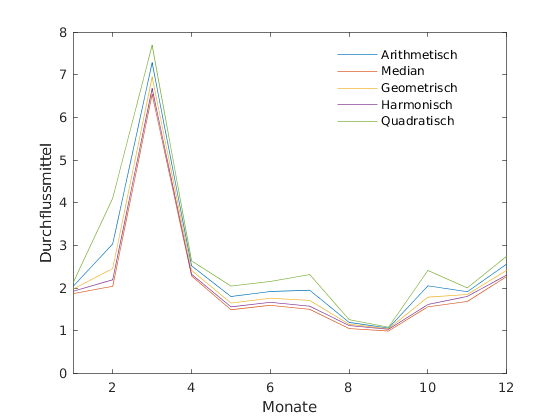

In [12]:
MittelwertDurchflussSteuerung_loesung